Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 29ms/step - accuracy: 0.8923 - loss: 0.3481 - val_accuracy: 0.9863 - val_loss: 0.0505
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9849 - loss: 0.0512 - val_accuracy: 0.9877 - val_loss: 0.0453
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.9895 - val_loss: 0.0374
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9924 - loss: 0.0237 - val_accuracy: 0.9910 - val_loss: 0.0359
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 29ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9907 - val_loss: 0.0347
313/313 - 3s - 11ms/step - accuracy: 0.9901 - loss: 0.0314

Test accuracy: 0.9901
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.99  

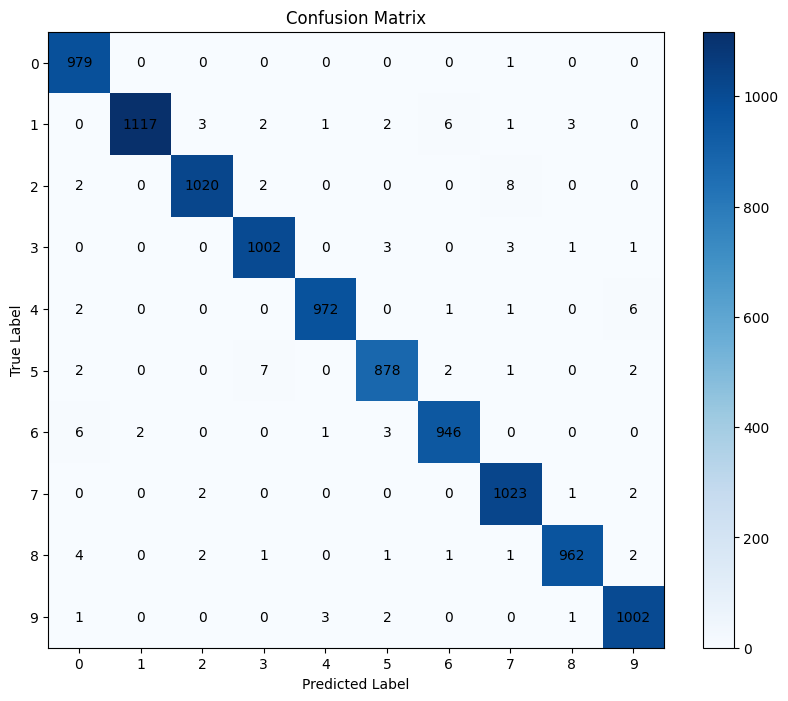

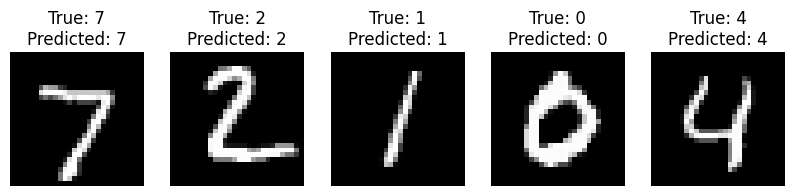

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Load MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Make predictions on the test set
y_pred = np.argmax(model.predict(x_test), axis=1)



print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(10), labels=range(10))
plt.yticks(np.arange(10), labels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add counts to the confusion matrix plot
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.show()

# Visualize predictions on test images
def plot_predictions(images, true_labels, predictions, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPredicted: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Display some test images with their predicted labels
plot_predictions(x_test, y_test, y_pred, num_images=5)
